<a href="https://colab.research.google.com/github/Syafaaat/C--xampp-htdocs-web_campus_2112500869/blob/main/syal_syah_syafaath_msib_7_test_linkaja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier


# Load the dataset
data = pd.read_csv('datasetTA.csv')

# Display the first few rows of the dataset
data.head()

,orderid,trans_status,trans_initiate_time,trans_end_time,debit_party_id,debit_party_type,debit_party_account,debit_party_mnemonic,credit_party_id,credit_party_type,...,initiator_mnemonic,reason,thirdpartyid,linkedorder_createtime,linkedorder_endtime,error_message,debit_user_sharia,credit_user_sharia,is_sharia,label
0,9DIxxxxU13,completed,2022-04-18 20:44:16,2022-04-18 20:44:16,201xxxxxxxxxxxx700,merchant,500xxxxxxxxxxxx136,628xxxxxxxx12 - CUxxxxxxxELL,201xxxxxxxxxxxx864,merchant,...,CUTxxxxxxxxxxxxxxxxxxxx412,NaN,Digital point-of-sales,NaN,NaN,NaN,False,False,False,unidentified
1,BGWxxxxKV3,completed,2022-09-28 15:41:28,2022-09-28 15:41:28,202xxxxxxxxxxxx292,customer,100xxxxxxxxxxxx440,628xxxxxxx10 - PAxxxxxxxxxxxxxxxxxxx SI,201xxxxxxxxxxxx496,merchant,...,628xxxxxxx10 - PAxxxxxxxxxxxxxxxxxxx SI,BuyGoodsKUE,NaN,NaN,NaN,NaN,False,False,False,unidentified
2,C4Dxxxx921,completed,2023-08-07 21:58:49,2023-08-07 21:58:49,202xxxxxxxxxxxx886,customer,100xxxxxxxxxxxx960,628xxxxxxx560-IPAxxxxxxPAH,202xxxxxxxxxxxx944,customer,...,628xxxxxxx560-IPAxxxxxxPAH,SendMoney,NaN,NaN,NaN,NaN,False,True,True,reported
3,7EGxxxxML2,completed,2020-05-16 9:25:38,2020-05-16 9:25:38,201xxxxxxxxxxxx278,merchant,500xxxxxxxxxxxx984,628xxxxxxxx57 - AUxxxxxELL-230xxxx663,201xxxxxxxxxxxx288,merchant,...,AUFxxxxELL-230xxxxxxxxxxxxxxxxxx157,NaN,Digital point-of-sales,NaN,NaN,NaN,False,False,False,unidentified
4,C4Dxxxx104,completed,2023-08-09 15:06:09,2023-08-09 15:06:09,202xxxxxxxxxxxx376,customer,200xxxxxxxxxxx000,628xxxxxxx684-AHMxxxxxxxxRDI,202xxxxxxxxxxxx000,customer,...,628xxxxxxx684-AHMxxxxxxxxRDI,SendMoney,NaN,NaN,NaN,NaN,False,False,False,unidentified


In [19]:
# Descriptive statistics for the dataset
data.describe(include='all')


,orderid,trans_status,trans_initiate_time,trans_end_time,debit_party_id,debit_party_type,debit_party_account,debit_party_mnemonic,credit_party_id,credit_party_type,...,initiator_mnemonic,reason,thirdpartyid,linkedorder_createtime,linkedorder_endtime,error_message,debit_user_sharia,credit_user_sharia,is_sharia,label
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,996,...,948,428,452,5,5,30,1000,1000,1000,1000
unique,997,4,1000,1000,696,2,307,858,138,3,...,779,46,9,5,5,26,2,2,2,2
top,C52xxxx40Z,completed,2023-12-05 8:15:16,2023-12-05 8:15:16,201xxxxxxxxxxxx820,merchant,500xxxxxxxxxxxx960,linxxxxxxxxxxxxst - Baxxxxxxxiri,201xxxxxxxxxxxx464,merchant,...,Ofx-us xxxxxxxxxxxxxxxxxxxxmsp,SendMoney,Digital point-of-sales,2020-08-18 23:07:30,2020-08-18 23:07:30,Failed to authenticate the transaction by limi...,False,False,False,unidentified
freq,2,968,1,1,14,539,34,14,61,639,...,72,301,266,1,1,2,886,961,858,900
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


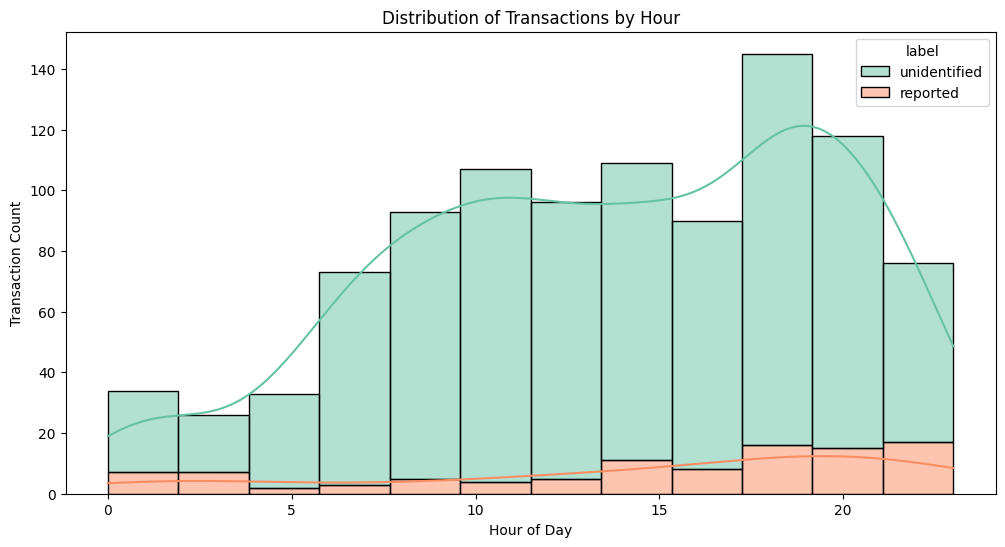

In [20]:
# Convert transaction initiation time to datetime format for analysis
data['trans_initiate_time'] = pd.to_datetime(data['trans_initiate_time'])

# Add a column for the hour of the transaction to analyze time patterns
data['hour'] = data['trans_initiate_time'].dt.hour

# Plot distribution of transactions over hours for both reported and unidentified labels
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='hour', hue='label', kde=True, palette="Set2", multiple="stack")
plt.title('Distribution of Transactions by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Transaction Count')
plt.show()


In [21]:
# Analyzing the frequency of transactions by customer_id for each label
customer_id_reported = data[data['label'] == 'reported']['debit_party_id'].value_counts()
customer_id_unidentified = data[data['label'] == 'unidentified']['debit_party_id'].value_counts()

# Combine into a single DataFrame for comparison
customer_id_comparison = pd.DataFrame({
    'reported': customer_id_reported,
    'unidentified': customer_id_unidentified
}).fillna(0)

# Sort by reported transactions
customer_id_comparison = customer_id_comparison.sort_values(by='reported', ascending=False)

# Display the top 10 customers with the most reported transactions
customer_id_comparison.head(10)


,reported,unidentified
debit_party_id,,
202xxxxxxxxxxxx695,5.0,2.0
202xxxxxxxxxxxx791,3.0,2.0
202xxxxxxxxxxxx531,2.0,1.0
202xxxxxxxxxxxx283,2.0,2.0
202xxxxxxxxxxxx149,2.0,1.0
202xxxxxxxxxxxx820,2.0,0.0
202xxxxxxxxxxxx043,2.0,0.0
202xxxxxxxxxxxx416,2.0,1.0
202xxxxxxxxxxxx422,2.0,0.0


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Prepare features and labels
X = data[['debit_party_id', 'credit_party_id', 'trans_initiate_time']]  # Ambil fitur yang relevan
y = data['label']

# Convert categorical features to numeric using LabelEncoder
le = LabelEncoder()
X['debit_party_id'] = le.fit_transform(X['debit_party_id'])
X['credit_party_id'] = le.fit_transform(X['credit_party_id'])

# Convert datetime to numerical features (e.g., hour of transaction)
X['trans_initiate_time'] = pd.to_datetime(X['trans_initiate_time']).dt.hour

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

    reported       0.00      0.00      0.00        18
unidentified       0.91      0.99      0.95       182

    accuracy                           0.90       200
   macro avg       0.45      0.49      0.47       200
weighted avg       0.83      0.90      0.86       200

[[  0  18]
 [  2 180]]


<ipython-input-22-3979777e901e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['debit_party_id'] = le.fit_transform(X['debit_party_id'])
<ipython-input-22-3979777e901e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['credit_party_id'] = le.fit_transform(X['credit_party_id'])
<ipython-input-22-3979777e901e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

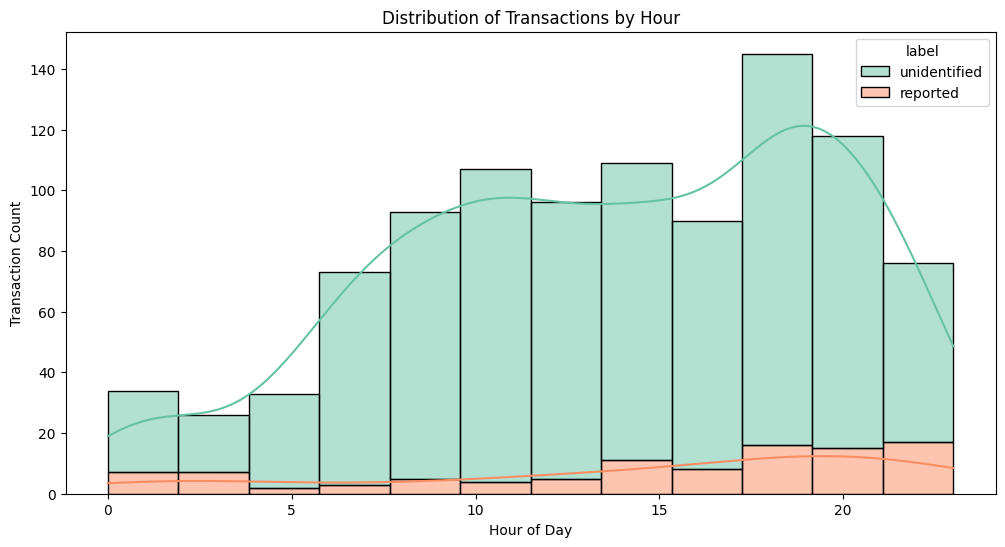

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add a column for the hour of the transaction to analyze time patterns
data['hour'] = data['trans_initiate_time'].dt.hour

# Plot distribution of transactions over hours for both reported and unidentified labels
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='hour', hue='label', kde=True, palette="Set2", multiple="stack")
plt.title('Distribution of Transactions by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Transaction Count')
plt.show()


In [24]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Akurasi model: {accuracy * 100:.2f}%")

# Evaluate the model using a confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Akurasi model: 90.00%

Confusion Matrix:
[[  0  18]
 [  2 180]]

Classification Report:
              precision    recall  f1-score   support

    reported       0.00      0.00      0.00        18
unidentified       0.91      0.99      0.95       182

    accuracy                           0.90       200
   macro avg       0.45      0.49      0.47       200
weighted avg       0.83      0.90      0.86       200



In [25]:
# Menampilkan 182 transaksi yang dicurigai
suspicious_transactions = data[data['label'] == 'unidentified'].head(182)

print(suspicious_transactions)


        orderid trans_status trans_initiate_time       trans_end_time  \
0    9DIxxxxU13    completed 2022-04-18 20:44:16  2022-04-18 20:44:16   
1    BGWxxxxKV3    completed 2022-09-28 15:41:28  2022-09-28 15:41:28   
3    7EGxxxxML2    completed 2020-05-16 09:25:38   2020-05-16 9:25:38   
4    C4Dxxxx104    completed 2023-08-09 15:06:09  2023-08-09 15:06:09   
5    8LHxxxxQ3D    completed 2021-12-17 16:03:39  2021-12-17 16:03:39   
..          ...          ...                 ...                  ...   
201  C50xxxxF14    completed 2023-09-19 08:22:55   2023-09-19 8:22:55   
202  C49xxxxC10    completed 2023-06-22 13:50:20  2023-06-22 13:50:20   
203  9GKxxxx7ZE    completed 2022-07-20 08:52:18   2022-07-20 8:52:18   
204  C49xxxxF15    completed 2023-06-21 18:42:39  2023-06-21 18:42:39   
206  8I8xxxxTHP    completed 2021-09-08 08:10:07   2021-09-08 8:10:07   

         debit_party_id debit_party_type debit_party_account  \
0    201xxxxxxxxxxxx700         merchant  500xxxxxxxxxxxx13

In [26]:
# Menyimpan transaksi yang dicurigai ke file CSV
suspicious_transactions.to_csv('suspicious_transactions.csv', index=False)

In [27]:
data = pd.read_csv('suspicious_transactions.csv')

# Display the first few rows of the dataset
data.head()

,orderid,trans_status,trans_initiate_time,trans_end_time,debit_party_id,debit_party_type,debit_party_account,debit_party_mnemonic,credit_party_id,credit_party_type,...,reason,thirdpartyid,linkedorder_createtime,linkedorder_endtime,error_message,debit_user_sharia,credit_user_sharia,is_sharia,label,hour
0,9DIxxxxU13,completed,2022-04-18 20:44:16,2022-04-18 20:44:16,201xxxxxxxxxxxx700,merchant,500xxxxxxxxxxxx136,628xxxxxxxx12 - CUxxxxxxxELL,201xxxxxxxxxxxx864,merchant,...,NaN,Digital point-of-sales,NaN,NaN,NaN,False,False,False,unidentified,20
1,BGWxxxxKV3,completed,2022-09-28 15:41:28,2022-09-28 15:41:28,202xxxxxxxxxxxx292,customer,100xxxxxxxxxxxx440,628xxxxxxx10 - PAxxxxxxxxxxxxxxxxxxx SI,201xxxxxxxxxxxx496,merchant,...,BuyGoodsKUE,NaN,NaN,NaN,NaN,False,False,False,unidentified,15
2,7EGxxxxML2,completed,2020-05-16 09:25:38,2020-05-16 9:25:38,201xxxxxxxxxxxx278,merchant,500xxxxxxxxxxxx984,628xxxxxxxx57 - AUxxxxxELL-230xxxx663,201xxxxxxxxxxxx288,merchant,...,NaN,Digital point-of-sales,NaN,NaN,NaN,False,False,False,unidentified,9
3,C4Dxxxx104,completed,2023-08-09 15:06:09,2023-08-09 15:06:09,202xxxxxxxxxxxx376,customer,200xxxxxxxxxxx000,628xxxxxxx684-AHMxxxxxxxxRDI,202xxxxxxxxxxxx000,customer,...,SendMoney,NaN,NaN,NaN,NaN,False,False,False,unidentified,15
4,8LHxxxxQ3D,completed,2021-12-17 16:03:39,2021-12-17 16:03:39,201xxxxxxxxxxxx271,merchant,500xxxxxxxxxxxx728,628xxxxxxxx81 - kyxxxxxell,201xxxxxxxxxxxx184,merchant,...,NaN,Digital point-of-sales,NaN,NaN,NaN,False,False,False,unidentified,16


In [28]:
# Contoh fitur dasar
df['hour'] = pd.to_datetime(df['trans_initiate_time']).dt.hour
df['amount'] = df['trans_amount']

# Pilih fitur yang digunakan
X = df[['amount', 'hour']]
y = df['label']


In [29]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model dan latih
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [30]:
df['prob_judi'] = model.predict_proba(X)[:, 1]  # kolom ke-1 = probabilitas class=1 (judi)

# Ambil rata-rata probabilitas dari 20 username tertentu
list_user_20 = ['user001', 'user002', 'user003', ...]  # ganti dengan ID user kamu
user_prob = df[df['debit_party_id'].isin(list_user_20)].groupby('debit_party_id')['prob_judi'].mean()
print(user_prob.sort_values(ascending=False))


Series([], Name: prob_judi, dtype: float64)


In [31]:
# Hitung probabilitas per user
df_filtered = df[df['debit_party_id'].isin(list_user_20)]
user_prob = df_filtered.groupby('debit_party_id')['prob_judi'].mean()

# Ubah jadi DataFrame dengan format persentase
user_prob_df = user_prob.reset_index()
user_prob_df.columns = ['Username', 'Probabilitas Judi']
user_prob_df['Probabilitas Judi'] = (user_prob_df['Probabilitas Judi'] * 100).round(0).astype(int).astype(str) + '%'

# Sort kalau mau
user_prob_df = user_prob_df.sort_values(by='Probabilitas Judi', ascending=False)

# Tampilkan hasil
print(user_prob_df.to_string(index=False))


Empty DataFrame
Columns: [Username, Probabilitas Judi]
Index: []


In [32]:
import pandas as pd
# Load data
df = pd.read_csv("suspicious_transactions.csv")

In [33]:
# Cek kolom yang ada
print(df.columns)

Index(['orderid', 'trans_status', 'trans_initiate_time', 'trans_end_time',
       'debit_party_id', 'debit_party_type', 'debit_party_account',
       'debit_party_mnemonic', 'credit_party_id', 'credit_party_type',
       'credit_party_account', 'credit_party_mnemonic', 'trans_amount', 'fee',
       'commission', 'discount_amount', 'redeemed_point_amount',
       'redeemed_point_type', 'currency', 'is_reversed', 'is_reversal',
       'is_partial_reversed', 'linked_type', 'linked_orderid',
       'derived_orderid', 'reason_type', 'reason_name', 'transaction_type',
       'remark', 'channel', 'initiator_id', 'initiator_mnemonic', 'reason',
       'thirdpartyid', 'linkedorder_createtime', 'linkedorder_endtime',
       'error_message', 'debit_user_sharia', 'credit_user_sharia', 'is_sharia',
       'label', 'hour'],
      dtype='object')


In [34]:
def some_calculation(df):
    # Example calculation: create a new column 'prob_judi' based on some logic
    return df['trans_amount'] / df['fee']  # Replace with your actual logic

df['prob_judi'] = some_calculation(df)


In [35]:
column_data = df.get('prob_judi', None)  # Returns None if 'prob_judi' does not exist


In [36]:
# To check if 'prob_judi' exists anywhere in the columns
'prob_judi' in df.columns


True

In [37]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("suspicious_transactions.csv")

# 1. Buat sistem scoring tanpa model ML
def calculate_risk_score(row):
    score = 0

    # Kriteria 1: Jumlah transaksi besar
    if row['trans_amount'] > df['trans_amount'].quantile(0.9):
        score += 30

    # Kriteria 2: Transaksi malam hari
    if pd.to_datetime(row['trans_initiate_time']).hour in [0,1,2,3,4,5]:
        score += 20

    # Kriteria 3: Channel online
    if str(row.get('channel', '')).lower() in ['online', 'mobile', 'web']:
        score += 15

    # Kriteria 4: Remark mengandung kata kunci judi
    gambling_keywords = ['slot', 'togel', 'bet', 'poker', 'casino', 'taruhan']
    if any(kw in str(row.get('remark', '')).lower() for kw in gambling_keywords):
        score += 35

    return min(100, score)  # Pastikan maksimum 100%

# Hitung score untuk semua transaksi
df['prob_judi'] = df.apply(calculate_risk_score, axis=1)

# 2. Generate output per user
user_prob = df.groupby('debit_party_id').agg({
    'prob_judi': 'mean',
    'trans_amount': 'count'
}).reset_index()

user_prob['prob_judi (%)'] = user_prob['prob_judi'].round(1).astype(str) + '%'
user_prob = user_prob.sort_values('prob_judi', ascending=False)

# 3. Output yang diinginkan
print("Daftar Pengguna dengan Indikasi Judi Online:")
print(user_prob[['debit_party_id', 'prob_judi (%)']].to_string(index=False))

# 4. Simpan hasil
user_prob[['debit_party_id', 'prob_judi (%)']].to_csv('hasil_skor_judi.csv', index=False)
print("\nHasil disimpan ke 'hasil_skor_judi.csv'")

print(user_prob[['debit_party_id', 'prob_judi (%)']].head(23).to_string(index=False))



Daftar Pengguna dengan Indikasi Judi Online:
    debit_party_id prob_judi (%)
202xxxxxxxxxxxx009         50.0%
201xxxxxxxxxxxx962         50.0%
201xxxxxxxxxxxx819         30.0%
202xxxxxxxxxxxx733         30.0%
201xxxxxxxxxxxx265         30.0%
202xxxxxxxxxxxx882         30.0%
202xxxxxxxxxxxx989         30.0%
202xxxxxxxxxxxx345         30.0%
202xxxxxxxxxxxx245         30.0%
202xxxxxxxxxxxx126         30.0%
202xxxxxxxxxxxx859         30.0%
202xxxxxxxxxxxx578         30.0%
202xxxxxxxxxxxx531         30.0%
202xxxxxxxxxxxx272         30.0%
202xxxxxxxxxxxx945         25.0%
201xxxxxxxxxxxx829         20.0%
201xxxxxxxxxxxx917         20.0%
202xxxxxxxxxxxx020         20.0%
202xxxxxxxxxxxx819         20.0%
201xxxxxxxxxxxx015         15.0%
201xxxxxxxxxxxx820         15.0%
201xxxxxxxxxxxx918         10.0%
201xxxxxxxxxxxx873         10.0%
201xxxxxxxxxxxx084          0.0%
201xxxxxxxxxxxx071          0.0%
201xxxxxxxxxxxx051          0.0%
201xxxxxxxxxxxx129          0.0%
201xxxxxxxxxxxx137          0.0

In [38]:
# Load the dataset
data = pd.read_csv('hasil_skor_judi.csv')

# Display the first few rows of the dataset
data.head()

,debit_party_id,prob_judi (%)
0,202xxxxxxxxxxxx009,50.0%
1,201xxxxxxxxxxxx962,50.0%
2,201xxxxxxxxxxxx819,30.0%
3,202xxxxxxxxxxxx733,30.0%
4,201xxxxxxxxxxxx265,30.0%


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('debit_party_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('prob_judi (%)').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('debit_party_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='debit_party_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('prob_judi (%)')):
  _plot_series(series, series_name, i)
  fig.legend(title='prob_judi (%)', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['prob_judi (%)'].value_counts()
    for x_label, grp in _df_6.groupby('debit_party_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('debit_party_id')
_ = plt.ylabel('prob_judi (%)')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['debit_party_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='index', y='debit_party_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['prob_judi (%)'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='prob_judi (%)', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)